In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data

In [70]:
data=pd.read_csv('car_age_price.csv')

Checking basic details

In [71]:
data.head(10)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [72]:
data.shape

(112, 2)

In [73]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [74]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


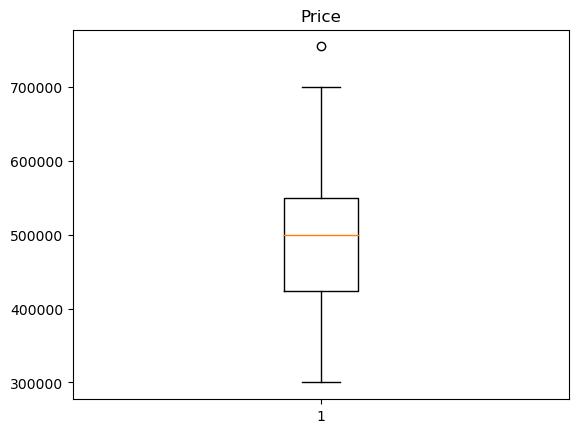

In [75]:
plt.figure()
plt.boxplot(data['Price'])
plt.title('Price')
plt.show()

In [76]:
Q1=np.percentile(data['Price'],25,interpolation='midpoint')
Q2=np.percentile(data['Price'],50,interpolation='midpoint')
Q3=np.percentile(data['Price'],75,interpolation='midpoint')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2312\4100604939.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Price'],25,interpolation='midpoint')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2312\4100604939.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Price'],50,interpolation='midpoint')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2312\4100604939.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher'

In [77]:
IQR=Q3-Q1

In [78]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [79]:
up_lim

741250.0

In [80]:
outliers=[]
for x in data['Price']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [81]:
outliers

[755000]

In [82]:
ind1=data['Price']>up_lim
data.loc[ind1].index

Index([1], dtype='int64')

In [83]:
data.drop([1],inplace=True)

In [84]:
data.shape

(111, 2)

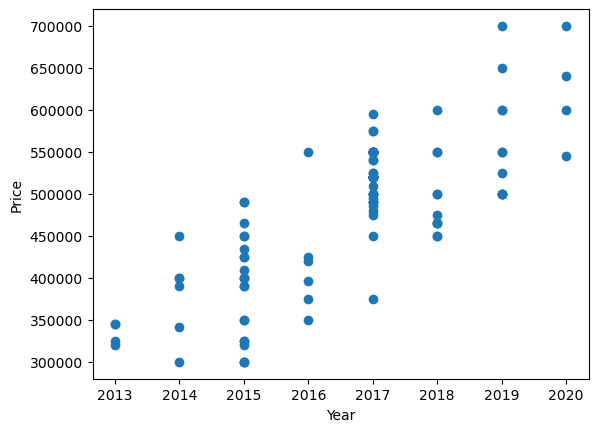

In [105]:
plt.scatter(data['Year'],data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Linear Regression

In [85]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [86]:
X=data['Year'].values.reshape(-1,1)    #feature
y=data['Price'].values                 #target

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25) 

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr=LinearRegression()

In [91]:
model1=lr.fit(X_train,y_train)

In [92]:
y_pred=model1.predict(X_test)

#### Evaluation

Text(0, 0.5, 'y_pred')

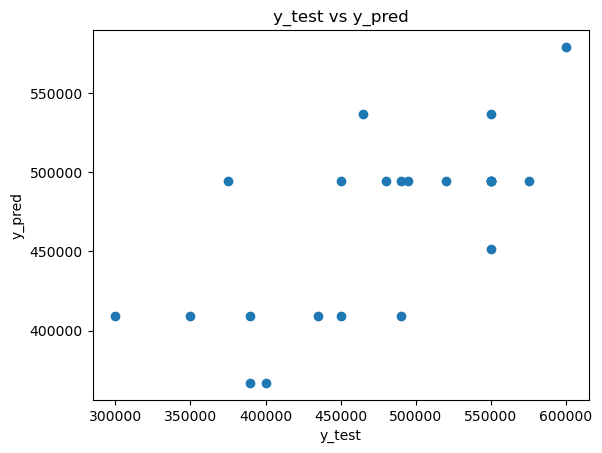

In [93]:
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred')            
plt.xlabel('y_test')                          
plt.ylabel('y_pred')   

In [94]:
from sklearn.metrics import mean_squared_error,r2_score

In [95]:
print('LR_MSE=',mean_squared_error(y_test,y_pred))
print('LR_RSE=',r2_score(y_test,y_pred))

LR_MSE= 3377616833.3043466
LR_RSE= 0.4510305670899456


Lasso Regression

In [96]:
from sklearn. linear_model import Lasso

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [98]:
lasso=Lasso(alpha=0.001)
model2=lasso. fit(X_train, y_train)

In [99]:
y_pred=model2.predict(X_test)

#### Evaluation

Text(0, 0.5, 'y_pred')

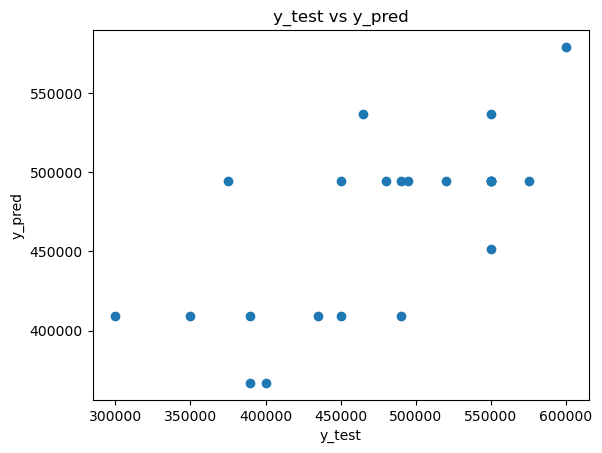

In [100]:
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred')            
plt.xlabel('y_test')                          
plt.ylabel('y_pred')   

In [101]:
print('Lasso_MSE=',mean_squared_error(y_test,y_pred))
print('Lasso_RSE=',r2_score(y_test,y_pred))

Lasso_MSE= 3377616828.924384
Lasso_RSE= 0.45103056780182793


Since there is only one feature in the data, no scaling is required.

### Prediction

In [103]:
lin_pred=model1.predict([[2022]])
las_pred=model2.predict([[2022]])

In [104]:
print('Linear_Model_Prediction =',lin_pred)
print('Lasso_Model_Prediction =',las_pred)

Linear_Model_Prediction = [706861.96638502]
Lasso_Model_Prediction = [706861.96450992]


Both Linear Regression Model and Lasso Regression model are equally performing.